# Exercise 3.15

This problem involves the `Boston` data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

## (a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

In [ ]:
est1 <- numeric()
for(name in names(Boston[-c(1)])) {
    t <- coef(summary(lm(as.formula(paste("crim ~ ", name)), data = Boston)))
    est1 <- c(est1, t[, "Estimate"][2])
    print(t)
    cat("\n")
}

               Estimate Std. Error   t value     Pr(>|t|)
(Intercept)  4.45369376  0.4172178 10.674746 4.037668e-24
zn          -0.07393498  0.0160946 -4.593776 5.506472e-06

              Estimate Std. Error   t value     Pr(>|t|)
(Intercept) -2.0637426 0.66722830 -3.093008 2.091266e-03
indus        0.5097763 0.05102433  9.990848 1.450349e-21

             Estimate Std. Error   t value     Pr(>|t|)
(Intercept)  3.744447  0.3961111  9.453021 1.239505e-19
chas        -1.892777  1.5061155 -1.256727 2.094345e-01

             Estimate Std. Error   t value     Pr(>|t|)
(Intercept) -13.71988   1.699479 -8.072992 5.076814e-15
nox          31.24853   2.999190 10.418989 3.751739e-23

             Estimate Std. Error   t value     Pr(>|t|)
(Intercept) 20.481804  3.3644742  6.087669 2.272000e-09
rm          -2.684051  0.5320411 -5.044819 6.346703e-07

              Estimate Std. Error   t value     Pr(>|t|)
(Intercept) -3.7779063 0.94398472 -4.002084 7.221718e-05
age          0.1077862 0.0127364

All predictors but `chas` appear to have statistically significant associations with the response.

## (b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis $H_0: \beta_j = 0$?

In [ ]:
t <- summary(lm(crim ~ ., data = Boston))
est2 <- coef(t)[, "Estimate"][-c(1)]
t


Call:
lm(formula = crim ~ ., data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-8.534 -2.248 -0.348  1.087 73.923 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.7783938  7.0818258   1.946 0.052271 .  
zn           0.0457100  0.0187903   2.433 0.015344 *  
indus       -0.0583501  0.0836351  -0.698 0.485709    
chas        -0.8253776  1.1833963  -0.697 0.485841    
nox         -9.9575865  5.2898242  -1.882 0.060370 .  
rm           0.6289107  0.6070924   1.036 0.300738    
age         -0.0008483  0.0179482  -0.047 0.962323    
dis         -1.0122467  0.2824676  -3.584 0.000373 ***
rad          0.6124653  0.0875358   6.997 8.59e-12 ***
tax         -0.0037756  0.0051723  -0.730 0.465757    
ptratio     -0.3040728  0.1863598  -1.632 0.103393    
lstat        0.1388006  0.0757213   1.833 0.067398 .  
medv        -0.2200564  0.0598240  -3.678 0.000261 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard 

We can reject the null hypotheses for `zn`, `dis`, `rad`, and `medv` if we set the siginificance level to 0.05.

## (c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the $x$-axis, and the multiple regression coefficients from (b) on the $y$-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the $x$-axis, and its coefficient estimate in the multiple linear regression model is shown on the $y$-axis.

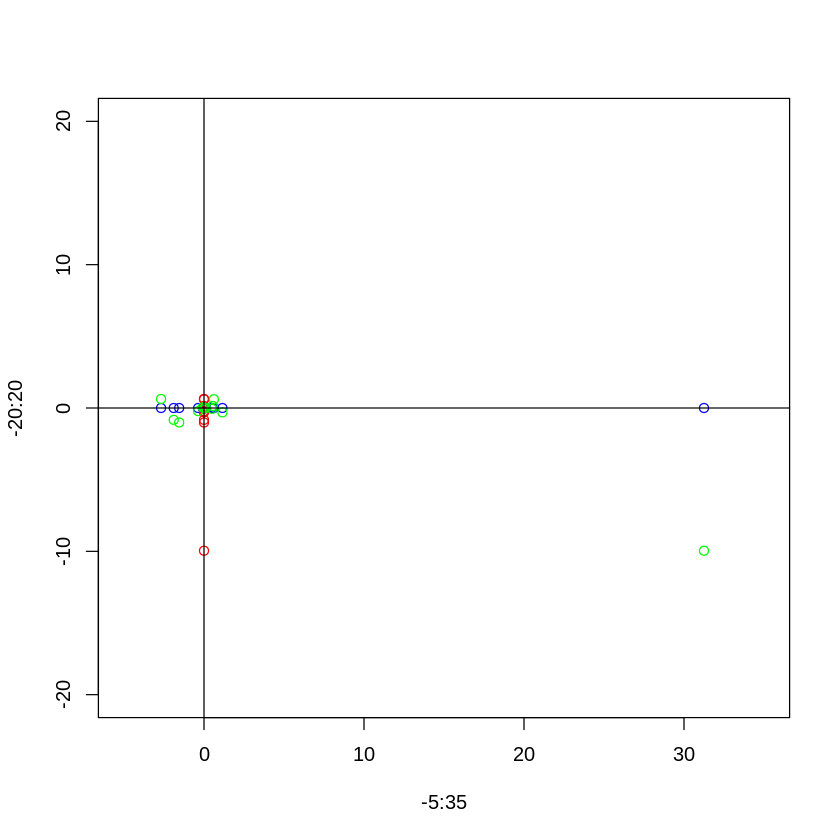

In [ ]:
plot(-5:35, -20:20, type="n")
points(est1, numeric(12), col="blue")
points(numeric(12), est2, col="red")
points(est1, est2, col="green")
abline(h = 0)
abline(v = 0)

## (d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor $X$, fit a model of the form $$Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon.$$

`chas` is a dummy variable, so I excluded it because the degree must be less than the number of unique points.

In [ ]:
for(name in names(Boston[-c(1, 4)])) {
    print(coef(summary(lm(as.formula(paste("crim ~ poly(", name, ", 3)")), data = Boston))))
    cat("\n")
}

               Estimate Std. Error   t value     Pr(>|t|)
(Intercept)    3.613524   0.372190  9.708814 1.547150e-20
poly(zn, 3)1 -38.749835   8.372207 -4.628389 4.697806e-06
poly(zn, 3)2  23.939832   8.372207  2.859441 4.420507e-03
poly(zn, 3)3 -10.071868   8.372207 -1.203012 2.295386e-01

                  Estimate Std. Error   t value     Pr(>|t|)
(Intercept)       3.613524   0.329998 10.950138 3.606468e-25
poly(indus, 3)1  78.590819   7.423121 10.587301 8.854243e-24
poly(indus, 3)2 -24.394796   7.423121 -3.286326 1.086057e-03
poly(indus, 3)3 -54.129763   7.423121 -7.292049 1.196405e-12

                Estimate Std. Error   t value     Pr(>|t|)
(Intercept)     3.613524   0.321573 11.237025 2.742908e-26
poly(nox, 3)1  81.372015   7.233605 11.249165 2.457491e-26
poly(nox, 3)2 -28.828594   7.233605 -3.985370 7.736755e-05
poly(nox, 3)3 -60.361894   7.233605 -8.344649 6.961110e-16

               Estimate Std. Error    t value     Pr(>|t|)
(Intercept)    3.613524  0.3702993  9.7583873 1.

According to $p$-values, some predictors like `indus`, `nox`, `dis`, and `medv` appear to have non-linear associations with the response.